In [1]:
###Comparing autism prevalence over years and countries.
#Loading the data.

import pandas as pd

asd_prev = pd.read_csv("autism_prevalence.csv")
asd_prev.head()

,Author,Title,Year Published,Country,Area(s),Age Range,Study Years,Case Identification Method,Case Criterion,Sample Size,...,Diagnosis Age Range (months),Diagnosis Mean Age (months),Diagnosis Median Age (months),IQ Score <70 (%),Adaptive Score <70 (%),Non-Verbal or Minimally Verbal (%),Percentage of Individual Co-occurring Conditions,Autism Types Included,Link to Publication,CDC Calculated Values
0,Lotter,Epidemiology of Autistic Conditions in Young C...,1966,England,County of Middlesex,8 to 10,1964,survey (mail); health records,Kanner,78000.0,...,NaN,NaN,NaN,84.0,NaN,59.0,NaN,autistic conditions,https://link.springer.com/article/10.1007/BF00...,IQ Score <70 (%); CI
1,Treffert,Epidemiology of infantile Autism,1970,USA,Wisconsin,2 to 12,1962-1967,health records,Kanner,899750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,classic infantile autism,https://www.ncbi.nlm.nih.gov/pubmed/5436867,CI
2,Brask,A Prevalence investigation of Childhood Psychoses,1972,Denmark,Åarhus County,2 to 14,1962,health records; service provider records,clinical interpretation,46500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,autistic syndrome,NaN,CI
3,"Wing, et al.",The prevalence of early childhood autism: comp...,1976,England,Camberwall,5 to 14,1974,registry; survey (unspecified),clinical interpretation,25000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,early childhood autism,https://pubmed.ncbi.nlm.nih.gov/935299/,CI
4,"Wing, et al.",Severe impairments of social interaction and a...,1979,England,Camberwell,0 to 14,1970,registry; service provider records,Kanner; clinical interpretation,35000.0,...,NaN,NaN,NaN,70.0,NaN,59.0,0 (Down syndrome),autism,https://www.ncbi.nlm.nih.gov/pubmed/155684,IQ Score <70 (%); CI


<Axes: xlabel='Year Published', ylabel='Count'>

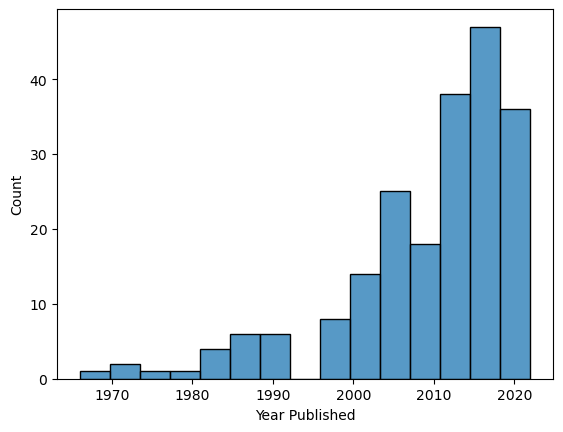

In [2]:
#Distribution of published studies by year of publication

import seaborn as sns

sns.histplot(asd_prev["Year Published"])

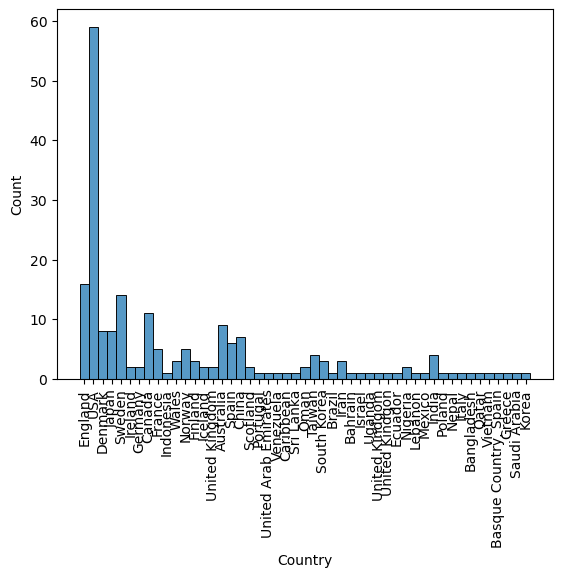

In [3]:
#Distribution of published studies by year of publication

import matplotlib.pyplot as plt

sns.histplot(asd_prev["Country"])
plt.xticks(rotation=90)
plt.show()

In [4]:
#Counting the countries
raw_country_counts = asd_prev['Country'].value_counts()
print(raw_country_counts)

Country
USA                      59
England                  16
Sweden                   14
Canada                   11
Australia                 9
Denmark                   8
Japan                     8
China                     7
Spain                     6
France                    5
Norway                    5
Taiwan                    4
India                     4
Wales                     3
Finland                   3
South Korea               3
Iran                      3
Nigeria                   2
Oman                      2
Germany                   2
Ireland                   2
Scotland                  2
United Kingdom            2
Iceland                   2
Bangladesh                1
Mexico                    1
Poland                    1
Nepal                     1
Italy                     1
Portugal                  1
Qatar                     1
Lebanon                   1
Basque Country, Spain     1
Greece                    1
Saudi Arabia              1
Vietnam     

In [5]:
#Replace the UK typos with the proper label
clean_asd_prev = asd_prev
clean_asd_prev.loc[clean_asd_prev["Country"].isin(["United Kindgom", "United Kindgon"]), "Country"] = "United Kingdom"

In [6]:
#Re-print counts to check the correction
country_counts = clean_asd_prev["Country"].value_counts()
print(country_counts)

Country
USA                      59
England                  16
Sweden                   14
Canada                   11
Australia                 9
Denmark                   8
Japan                     8
China                     7
Spain                     6
France                    5
Norway                    5
India                     4
United Kingdom            4
Taiwan                    4
Wales                     3
Finland                   3
Iran                      3
South Korea               3
Ireland                   2
Oman                      2
Nigeria                   2
Scotland                  2
Germany                   2
Iceland                   2
Saudi Arabia              1
Qatar                     1
Basque Country, Spain     1
Greece                    1
Mexico                    1
Bangladesh                1
Italy                     1
Nepal                     1
Poland                    1
Vietnam                   1
Sri Lanka                 1
Lebanon     

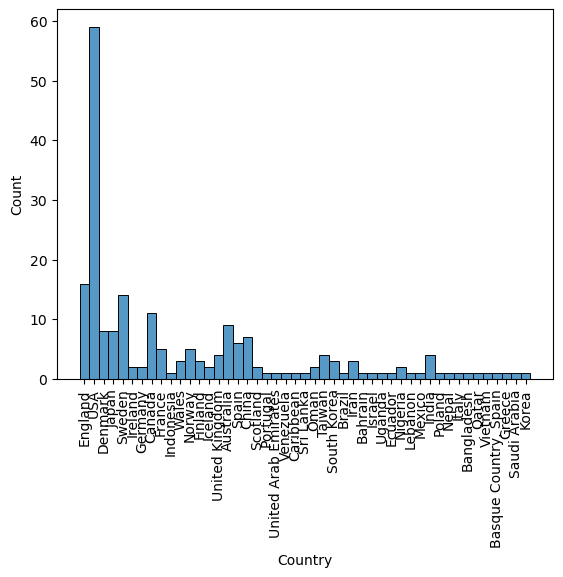

In [7]:
#Distribution of published studies by Country

sns.histplot(clean_asd_prev["Country"])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='ASD Prevalence Estimate per 1,000', ylabel='Count'>

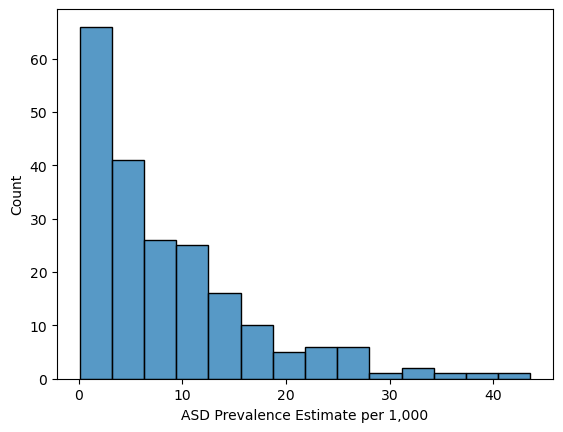

In [8]:
#Distribution of the ASD prevalence estimates
sns.histplot(clean_asd_prev["ASD Prevalence Estimate per 1,000"])

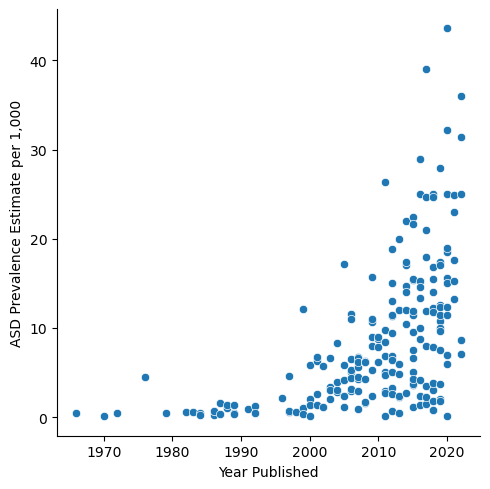

In [9]:
#Relationship plot of ASD estimates by Year of Publication
sns.relplot(data = clean_asd_prev,
            x = "Year Published",
            y = "ASD Prevalence Estimate per 1,000"
           )

In [10]:
#Correlation between ASD prevalence and year of publicaltion

asd_yop_corr = clean_asd_prev["ASD Prevalence Estimate per 1,000"].corr(clean_asd_prev["Year Published"])
print(f"Correlation between ASD Prevalence Estimate per 1,000 and Year Published: {asd_yop_corr}")

Correlation between ASD Prevalence Estimate per 1,000 and Year Published: 0.5202786203070219


In [11]:
## Linear regression
#defining X and y
X = clean_asd_prev[["Year Published"]]
y = clean_asd_prev["ASD Prevalence Estimate per 1,000"]

#Setting up the model
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 42)

In [12]:
from sklearn.linear_model import LinearRegression

global_lm = LinearRegression(fit_intercept=True)
global_lm.fit(train_X, train_y)

LinearRegression()

In [13]:
#getting the r2 value of the model
lm_score = global_lm.score(test_X, test_y)
print(f"Linear model r2: {lm_score}")

Linear model r2: 0.33916825379251836


In [14]:
#Setting-up the prediction to graph
pred_lmmodel = pd.DataFrame({"Year Published": [X["Year Published"].min(), X["Year Published"].max()]})
pred_lmmodel["ASD Prevalence Estimate per 1,000"] = global_lm.predict(pred_lmmodel)
print(pred_lmmodel["ASD Prevalence Estimate per 1,000"])

0    -7.632003
1    13.520203
Name: ASD Prevalence Estimate per 1,000, dtype: float64


<Axes: xlabel='Year Published', ylabel='ASD Prevalence Estimate per 1,000'>

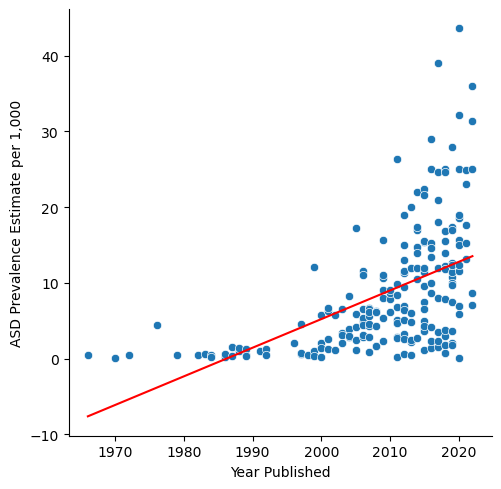

In [15]:
#plotting model prediction

sns.relplot(data = clean_asd_prev,
            x = "Year Published",
            y = "ASD Prevalence Estimate per 1,000"
           )

sns.lineplot(data = pred_lmmodel,
            x = "Year Published",
            y = "ASD Prevalence Estimate per 1,000",
             c = "red"
           )

In [16]:
##Trying a Polynomial instead
from sklearn.preprocessing import PolynomialFeatures #for adding polynomial functions - determines the degree of the model
from sklearn.pipeline import Pipeline #to create the model
from sklearn.model_selection import GridSearchCV

poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
])

degree_parameters = {
    'poly__degree' : range(1, 6)
}

global_pm_cv = GridSearchCV(poly_pipeline, degree_parameters)
global_pm_cv.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('linear', LinearRegression())]),
             param_grid={'poly__degree': range(1, 6)})

In [17]:
global_cv_results = pd.DataFrame(global_pm_cv.cv_results_)
global_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_poly__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004401,0.001747,0.001614,0.000799,1,{'poly__degree': 1},-14.570070,-0.288572,0.037928,0.015533,-0.060303,-2.973097,5.799638,1
1,0.003481,0.001519,0.001405,0.000493,2,{'poly__degree': 2},-45.454509,0.077571,0.079483,0.027207,0.073393,-9.039371,18.207579,2
2,0.003436,0.002327,0.001401,0.000492,3,{'poly__degree': 3},-2362.708662,0.034911,0.072957,0.031036,0.083631,-472.497225,945.105719,5
3,0.002704,0.000749,0.001203,0.000400,4,{'poly__degree': 4},-2294.110210,0.034946,0.072755,0.031068,0.083674,-458.777554,917.666329,4
4,0.002224,0.000451,0.001200,0.000398,5,{'poly__degree': 5},-2227.710214,0.034983,0.072551,0.031099,0.083714,-445.497573,891.106321,3


In [18]:
#polynomial regression features
poly = PolynomialFeatures(degree = 3)
yop_poly = poly.fit_transform(X)

global_pm = LinearRegression()
global_pm.fit(yop_poly, y)

LinearRegression()

In [19]:
global_pm.score(yop_poly, y)

0.3356711393965779

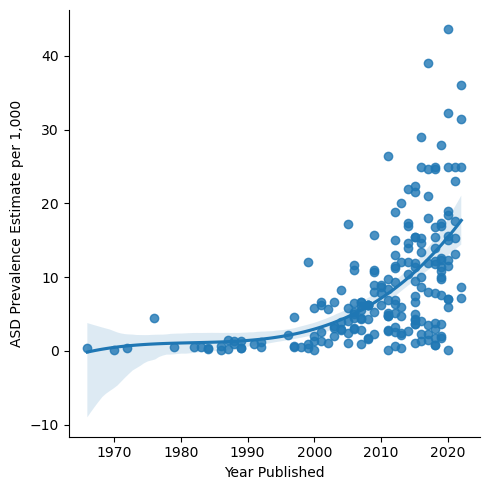

In [20]:
sns.lmplot(data = clean_asd_prev,
            x = "Year Published",
            y = "ASD Prevalence Estimate per 1,000",
           order = 3
           )

In [21]:
#GAM model - setting up the model parameters

from pygam import LinearGAM, s, f

global_gam = LinearGAM(s(0))
global_gam.fit(X, y)

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, terms=s(0) + intercept, tol=0.0001, 
   verbose=False)

In [22]:
#Setting up the gam model prediction
import numpy as np

X1_pred = np.linspace(1966, 2022) 
y1_pred = global_gam.predict(X1_pred)

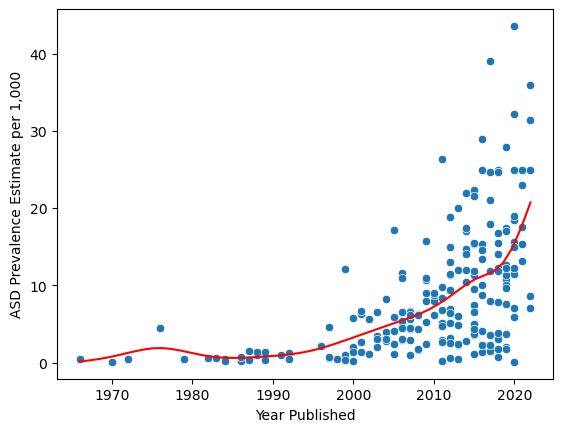

In [23]:
sns.scatterplot(data = clean_asd_prev,
            x = "Year Published",
            y = "ASD Prevalence Estimate per 1,000"
           )

plt.plot(X1_pred, y1_pred, color='red', label='GAM fit')

In [24]:
from sklearn.metrics import mean_squared_error

# Evaluate the model
global_mse = mean_squared_error(y, global_gam.predict(X))
print(f'Mean Squared Error: {global_mse}')

Mean Squared Error: 43.422338254199786


In [25]:
#Subset for countries with top 5 highest frequency 

country_counts = clean_asd_prev['Country'].value_counts()

#ideentify the top 5 countries
top_countries = country_counts.nlargest(5).index

#subset by the top countries
top_country_asd = clean_asd_prev[clean_asd_prev['Country'].isin(top_countries)]
top_country_asd.head()

,Author,Title,Year Published,Country,Area(s),Age Range,Study Years,Case Identification Method,Case Criterion,Sample Size,...,Diagnosis Age Range (months),Diagnosis Mean Age (months),Diagnosis Median Age (months),IQ Score <70 (%),Adaptive Score <70 (%),Non-Verbal or Minimally Verbal (%),Percentage of Individual Co-occurring Conditions,Autism Types Included,Link to Publication,CDC Calculated Values
0,Lotter,Epidemiology of Autistic Conditions in Young C...,1966,England,County of Middlesex,8 to 10,1964,survey (mail); health records,Kanner,78000.0,...,NaN,NaN,NaN,84.0,NaN,59.0,NaN,autistic conditions,https://link.springer.com/article/10.1007/BF00...,IQ Score <70 (%); CI
1,Treffert,Epidemiology of infantile Autism,1970,USA,Wisconsin,2 to 12,1962-1967,health records,Kanner,899750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,classic infantile autism,https://www.ncbi.nlm.nih.gov/pubmed/5436867,CI
3,"Wing, et al.",The prevalence of early childhood autism: comp...,1976,England,Camberwall,5 to 14,1974,registry; survey (unspecified),clinical interpretation,25000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,early childhood autism,https://pubmed.ncbi.nlm.nih.gov/935299/,CI
4,"Wing, et al.",Severe impairments of social interaction and a...,1979,England,Camberwell,0 to 14,1970,registry; service provider records,Kanner; clinical interpretation,35000.0,...,NaN,NaN,NaN,70.0,NaN,59.0,0 (Down syndrome),autism,https://www.ncbi.nlm.nih.gov/pubmed/155684,IQ Score <70 (%); CI
6,"Bohman, et al.",Childhood psychosis in a northern Swedish coun...,1983,Sweden,Västerbotten County,0 to 20,1979,survey (mail),Rutter; clinical interpretation,69000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,early infantile autism,NaN,CI


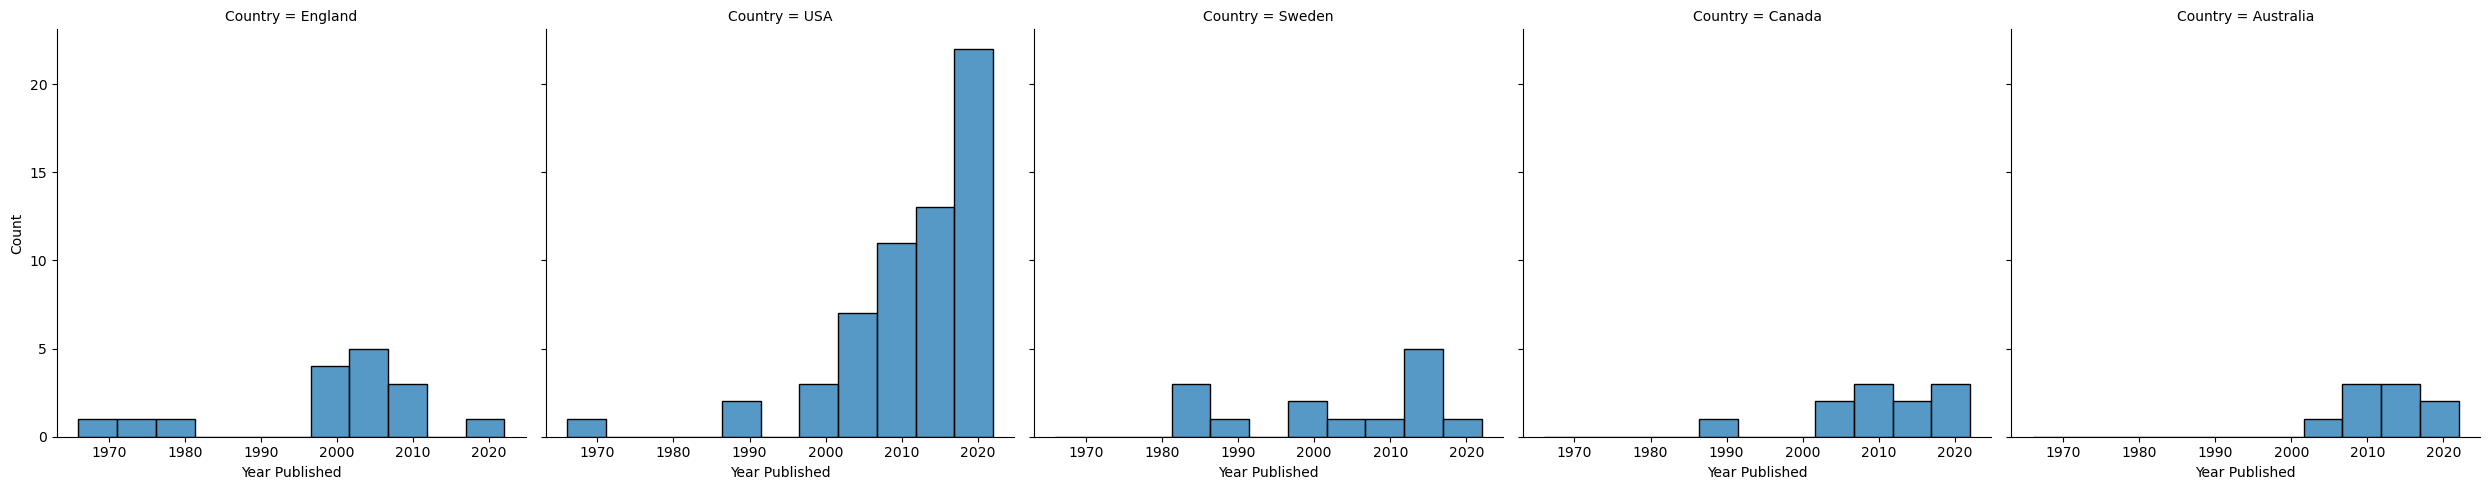

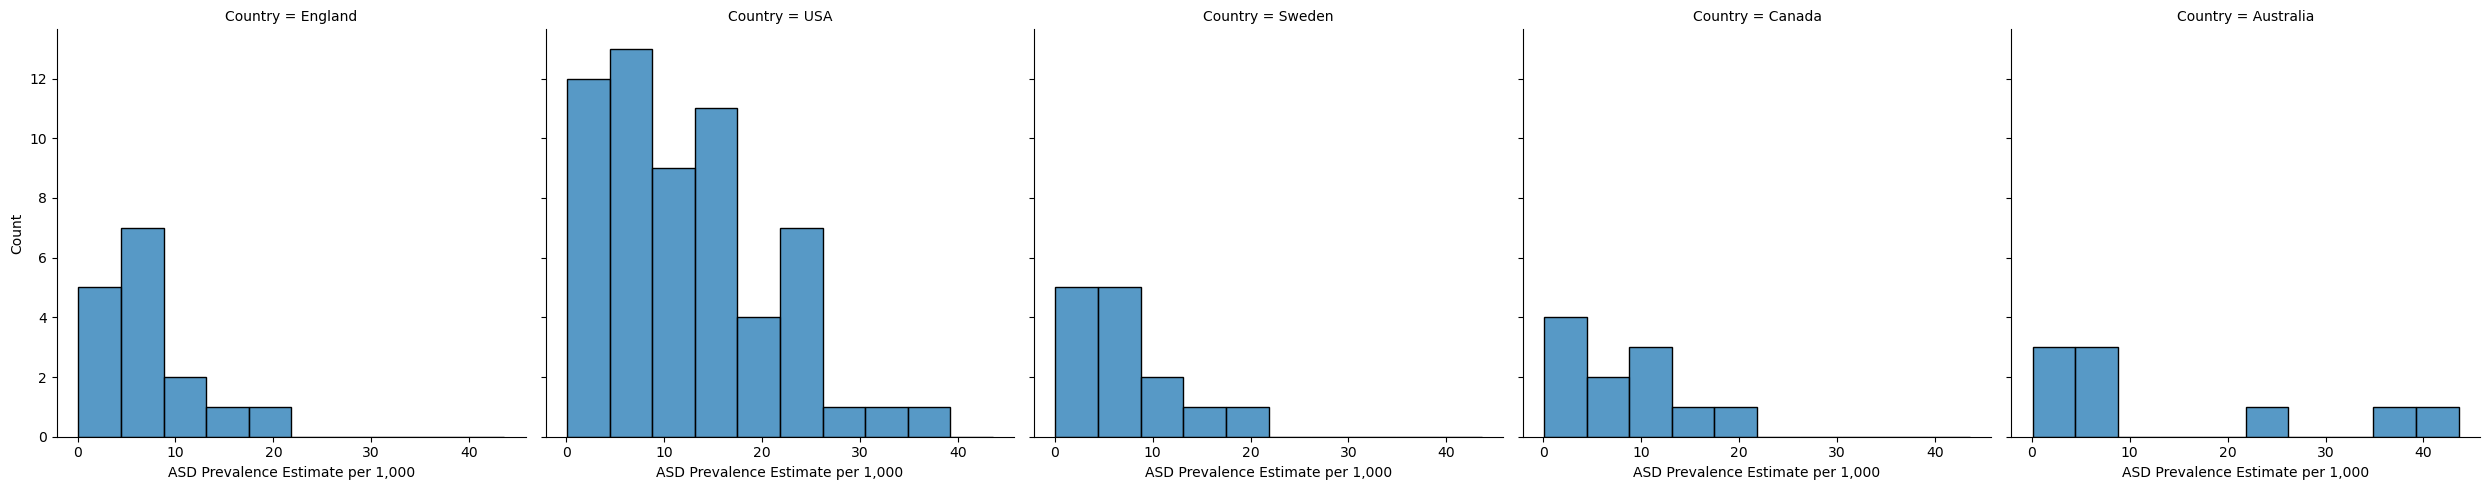

In [26]:
sns.displot(data = top_country_asd,
            x = "Year Published",
           col = "Country"
           )

sns.displot(data = top_country_asd,
            x = "ASD Prevalence Estimate per 1,000",
           col = "Country"
           )

In [27]:
#subset for multiple publications in one year

top_country_asd['Year Published'].value_counts()

Year Published
2015    8
2012    7
2019    6
2017    6
2006    6
2020    6
2018    5
2011    5
2009    5
2016    4
2021    4
2007    4
2008    4
2014    3
1999    3
2000    3
2010    3
2003    3
2004    3
2005    2
2022    2
2002    2
2001    2
1970    1
1997    1
1991    1
2013    1
1989    1
1988    1
1987    1
1986    1
1984    1
1983    1
1979    1
1976    1
1966    1
Name: count, dtype: int64

In [28]:
#Identify coutries witth multiple publications in same year
year_2015 = top_country_asd[top_country_asd['Year Published'] == 2015]
print(year_2015["Country"])

124          USA
127       Sweden
128    Australia
130       Sweden
131       Sweden
132       Canada
135          USA
137          USA
Name: Country, dtype: object


In [29]:
#subset USA and Sweden from the 2015 YoP

countries = ['USA', 'Sweden']

USA_Swe = year_2015[year_2015['Country'].isin(countries)]

<Axes: xlabel='Country', ylabel='ASD Prevalence Estimate per 1,000'>

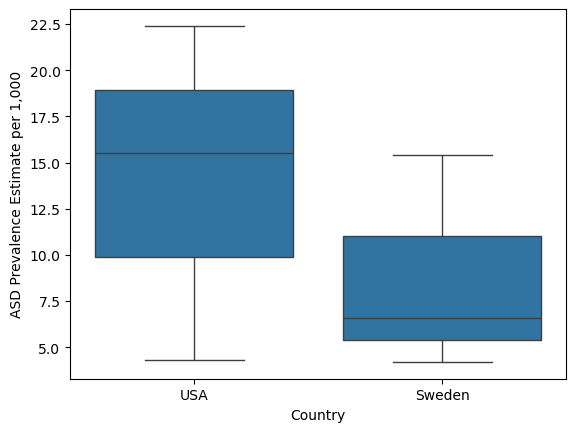

In [30]:
sns.boxplot(data =USA_Swe, 
            x = 'Country', 
            y = 'ASD Prevalence Estimate per 1,000'
           )

In [31]:
#Define the groups

USA = USA_Swe[USA_Swe['Country'] == 'USA']['ASD Prevalence Estimate per 1,000']
SWE = USA_Swe[USA_Swe['Country'] == 'Sweden']['ASD Prevalence Estimate per 1,000']

# Perform the test
import scipy.stats as stats
USAvsSwe_test = stats.mannwhitneyu(USA, SWE, alternative='two-sided')

# Print the results
print(f"Statistic: {USAvsSwe_test.statistic}, p-value: {USAvsSwe_test.pvalue}")

Statistic: 7.0, p-value: 0.4
